In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
a_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/after.png')

b_img = cv2.cvtColor(b_img, cv2.COLOR_BGR2GRAY)
a_img = cv2.cvtColor(a_img, cv2.COLOR_BGR2GRAY)


In [12]:
b_img.max(), np.median(b_img), b_img.min()

(246, 77.0, 14)

In [51]:
thresh, thresh_img = cv2.threshold(b_img, 130, 256, type=cv2.THRESH_BINARY)

In [52]:
thresh_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

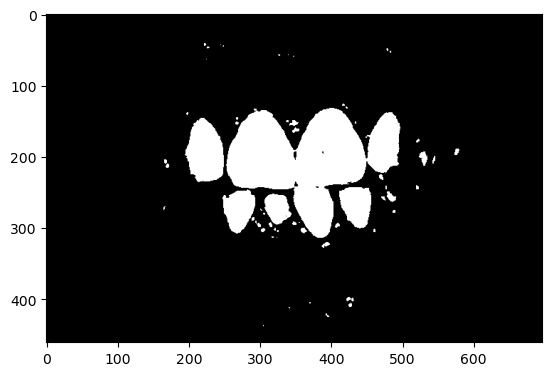

In [53]:
plt.imshow(thresh_img, cmap='gray')
plt.show()